# Statistical Analysis of YouTube

In [15]:
#Importing Library files
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [20]:
file_path = '/Users/asharani/Downloads/Global YouTube Statistics_new.xlsx'

# Read Excel file into a pandas DataFrame
yt = pd.read_excel(file_path)

# Display the first 10 rows of the DataFrame to verify the data has been loaded
yt.head(10)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,View Retention,Views per upload,Performance rate
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006,Mar,13,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,930.612245,1.135345e+07,Average
1,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,48,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012,Feb,20,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,170.896638,3.828454e+07,Low
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006,Sep,1,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1012.345679,1.697723e+08,Average
3,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006,Sep,20,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,930.817610,1.269994e+06,Average
4,7,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015,May,12,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,832.562862,8.393073e+07,Average
5,8,PewDiePie,111000000,29058044447,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44,1.0,4.0,3.918400e+07,9800.0,156700.0,117600.0,1900000.0,NaN,2010,Apr,29,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924,261.784184,6.161587e+06,Low
6,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630,5.0,25.0,4.894700e+07,12200.0,195800.0,146800.0,2300000.0,100000.0,2016,Jan,14,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,853.576038,1.835275e+08,Average
7,10,Vlad and Niki,98900000,77180169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8,5.0,6.0,5.805740e+08,145100.0,2300000.0,1700000.0,27900000.0,600000.0,2018,Apr,23,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,780.385944,1.344602e+08,Average
8,11,Zee Music Company,96700000,57856289381,Music,Zee Music Company,8548,India,IN,Music,12,3.0,2.0,8.036130e+08,200900.0,3200000.0,2400000.0,38600000.0,1100000.0,2014,Mar,12,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,598.307026,6.768401e+06,Average
9,12,WWE,96000000,77428473662,Sports,WWE,70127,United States,US,Sports,7,6.0,1.0,7.146140e+08,178700.0,2900000.0,2100000.0,34300000.0,600000.0,2007,May,11,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,806.546601,1.104118e+06,Average


# Data Preprocessing

We used Excel as an effective tool for data cleaning since we recognized its effectiveness in dealing with the complexity of our dataset. The use of Excel enabled a more customized and easy way to dealing with redundancy such as special characters and empty spacing. Removing null values deliberately for attributes that are critical to answering the research questions helps to retain data integrity while improving analysis quality. This method provides for a more concentrated and targeted investigation of aspects related to YouTube channel performance while minimizing needless data loss by maintaining critical information.


In [19]:
# Filling NaN values with the mean for numerical columns
numerical_columns = yt.select_dtypes(include=[np.number]).columns.tolist()
yt[numerical_columns] = yt[numerical_columns].fillna(yt[numerical_columns].mean())

# Filling NaN values with the mode for categorical columns
categorical_columns = yt.select_dtypes(exclude=[np.number]).columns.tolist()
yt[categorical_columns] = yt[categorical_columns].fillna(yt[categorical_columns].mode().iloc[0])

# Rechecking for NaN values in the dataset
yt.isna().sum()



rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

# Exploratory Data Analysis

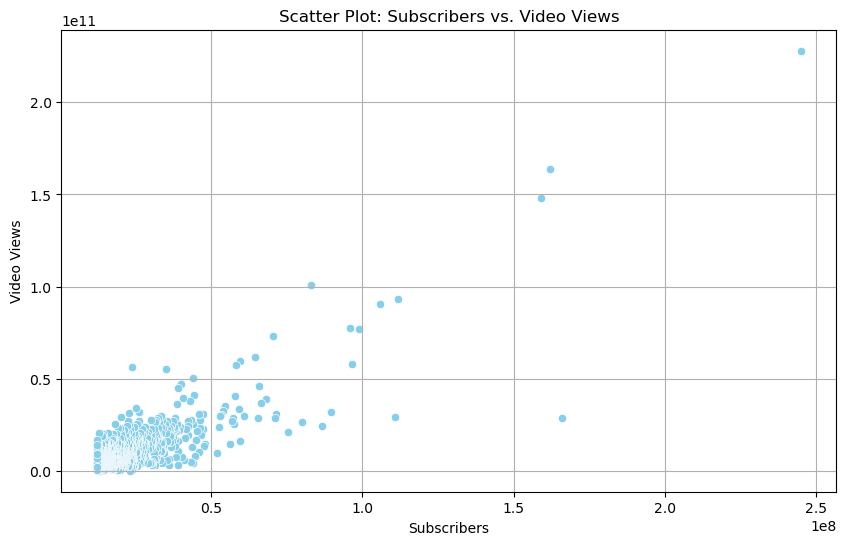

In [24]:
# Create a scatter plot for Subscribers vs. Video Views

plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', data=yt, color='skyblue')
plt.title('Scatter Plot: Subscribers vs. Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.grid(True)
plt.show()

The scatter plot shows that there is a direct correlation between the number of subscribers and the number of video views. This positive association implies that YouTube channels with a higher number of subscribers typically have more views on their videos. This pattern is graphically confirmed by the scatter plot, which displays an overall rising trajectory, supporting the idea that YouTube channels with greater subscriber numbers also have higher video view counts.


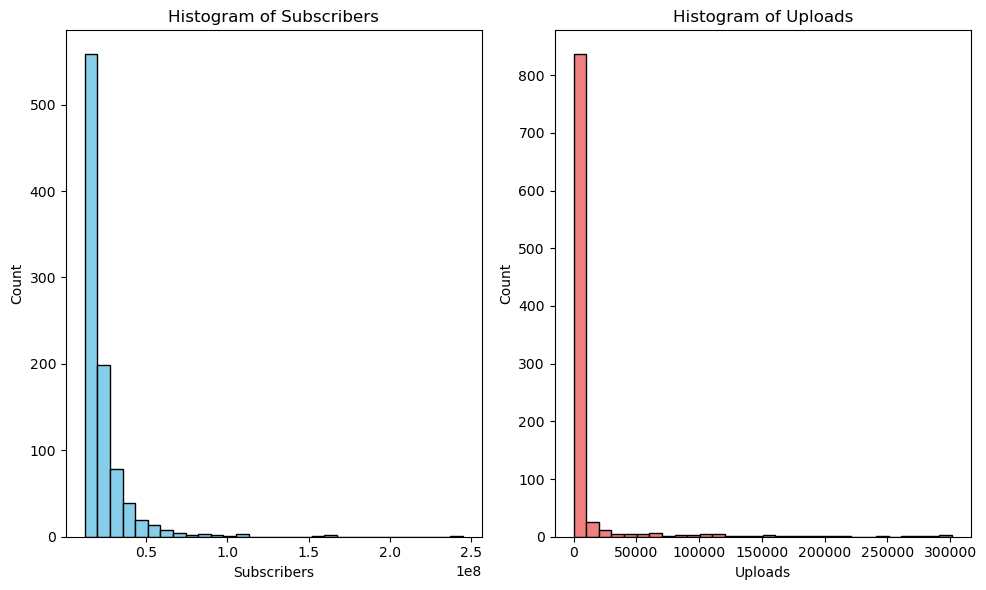

In [42]:
#Histograms of Subscribers and Uploads Distribution

plt.figure(figsize=(10, 6))

# Histogram for Subscribers
plt.subplot(1, 2, 1)
plt.hist(yt['subscribers'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Count')

# Histogram for Uploads
plt.subplot(1, 2, 2)
plt.hist(yt['uploads'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Uploads')
plt.xlabel('Uploads')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



Interpretation of the Subscribers Histogram: 
The YouTube channel distribution is shown in this histogram, which is based on subscriber counts. The range of subscribers is shown by the x-axis, while the number of channels within each range is shown by the y-axis. With a high of between 12.3 million and 20.1 million members, most channels are in the lower subscriber categories. The number of channels falls as the subscriber count rises, suggesting that fewer channels have greater subscriber counts. This distribution sheds light on the popularity of channels that are prevalent to varied degrees.

Interpretation of the Uploads Histogram: 
Based on the number of uploads, the YouTube channel distribution is depicted in this histogram. The range of uploads is shown by the x-axis, while the number of channels within each range is shown by the y-axis. With a peak between one and ten thousand uploads, most channels have very little submissions. A lower percentage of channels are prolific content creators as the quantity of uploads rises and the count of channels falls. This distribution provides insight into how YouTube channels have been adding content over the dataset.


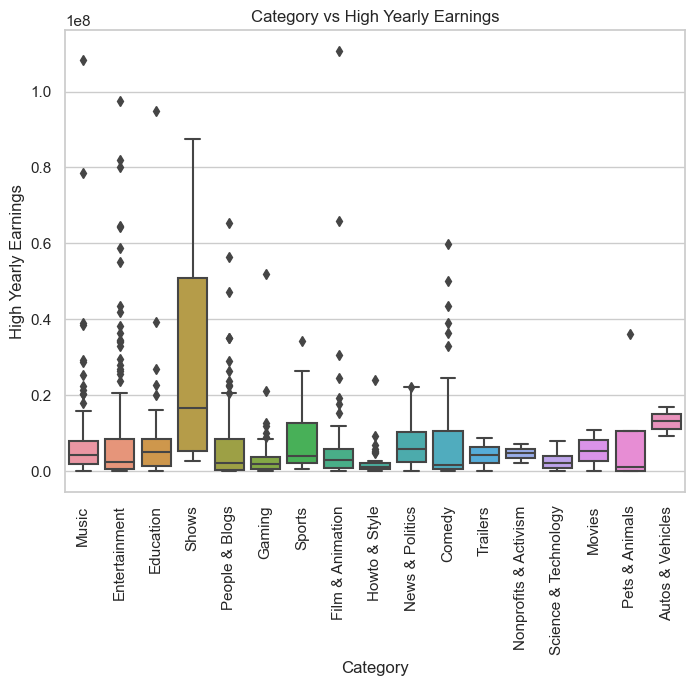

                       count          mean           std         min  \
category                                                               
Autos & Vehicles         2.0  1.315000e+07  5.444722e+06  9300000.00   
Comedy                  66.0  8.404015e+06  1.333296e+07        0.00   
Education               42.0  8.895181e+06  1.578840e+07        0.00   
Entertainment          224.0  8.031424e+06  1.447097e+07        0.00   
Film & Animation        43.0  9.071830e+06  1.959872e+07        0.00   
Gaming                  89.0  3.354206e+06  6.228487e+06        0.00   
Howto & Style           37.0  2.442127e+06  4.248758e+06        0.05   
Movies                   2.0  5.450000e+06  7.707464e+06        0.00   
Music                  195.0  6.881720e+06  1.099764e+07        0.00   
News & Politics         26.0  7.707753e+06  6.776944e+06        0.05   
Nonprofits & Activism    2.0  4.700000e+06  3.535534e+06  2200000.00   
People & Blogs         125.0  6.891759e+06  1.104166e+07        

In [54]:
# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='highest_yearly_earnings', data=yt)
plt.title('Category vs High Yearly Earnings')
plt.xlabel('Category')
plt.ylabel('High Yearly Earnings')
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Get the summary statistics for each category
summary_stats = yt.groupby('category')['highest_yearly_earnings'].describe()
print(summary_stats)

The distribution of high yearly earnings across different YouTube video genres is shown visually in the box plot. Every box denotes a category and offers information on the earnings distribution and central tendency within each. While "Science & Technology" and "Gaming" have relatively lower median incomes, categories like "Shows" have a broader range, suggesting increased unpredictability in earnings.  All things considered, the box plot illustrates the variation in high annual revenue among various YouTube video genres.


# Performance Metrics Analysis

                         subscribers  video views  highest_yearly_earnings  \
subscribers                 1.000000     0.826682                 0.429265   
video views                 0.826682     1.000000                 0.550679   
highest_yearly_earnings     0.429265     0.550679                 1.000000   
uploads                     0.087067     0.162917                 0.160579   

                          uploads  
subscribers              0.087067  
video views              0.162917  
highest_yearly_earnings  0.160579  
uploads                  1.000000  


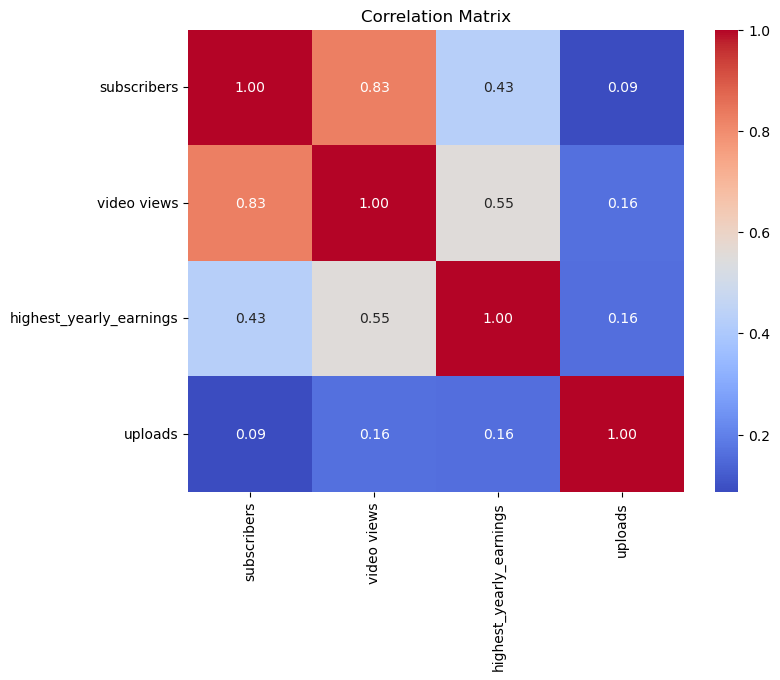

In [7]:
correlation_matrix1 = yt[['subscribers', 'video views', 'highest_yearly_earnings','uploads']].corr()

print(correlation_matrix1)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The above graph show that there is a strong positive correlation between Subscribers and Video Views compared to the correlation observed between highest yearly earnings with Subscribers and Video Views.The correlation coefficient between'video views' and'uploads' is roughly 0.16.This suggests a weak positive correlation between the two variables.In simpler terms, there is a slight tendency for channels with more 'uploads' to have higher 'video views,' but the correlation is not strong.

category
Autos & Vehicles           2
Comedy                    66
Education                 42
Entertainment            224
Film & Animation          43
Gaming                    89
Howto & Style             37
Movies                     2
Music                    195
News & Politics           26
Nonprofits & Activism      2
People & Blogs           125
Pets & Animals             4
Science & Technology      16
Shows                     10
Sports                    11
Trailers                   2
Name: Performance rate, dtype: int64


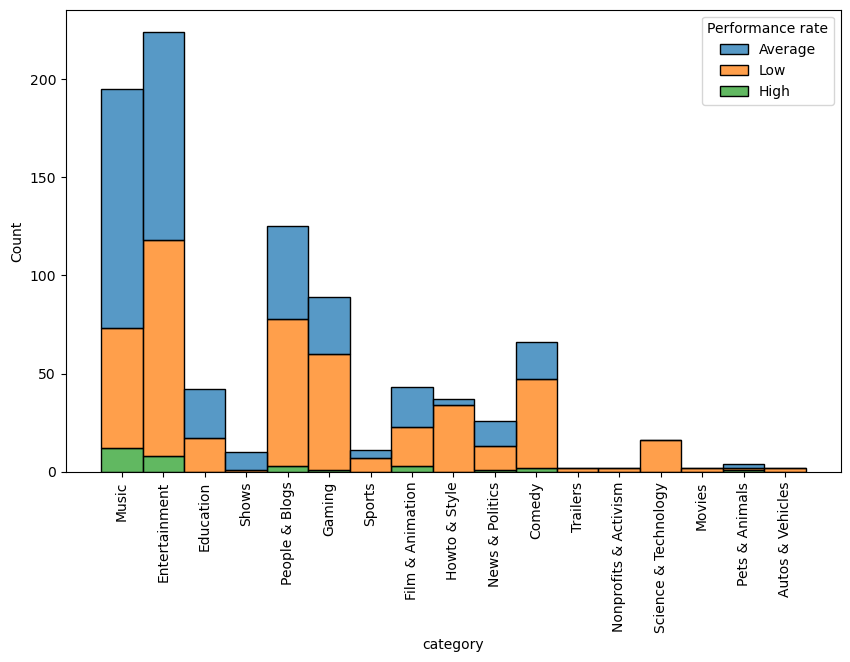

In [22]:
#Performance Rate Distribution Across YouTube Video Categories

count = yt.groupby('category')['Performance rate'].apply(lambda x: x.count())
print(count)


plt.figure(figsize=(10, 6))
sns.histplot(data=yt, x="category", hue="Performance rate",multiple="stack")
plt.xticks(rotation=90)
plt.show()

The histogram visualizes the distribution of performance rates across different YouTube video categories. The performance rates are stacked within each category, allowing for a comparative analysis.The highest number of channels with a high performance rate is found in the comedy category (66 channels), which is followed by the entertainment and music categories (224 and 195 channels, respectively). In comparison, 'Howto & Style' and 'Science & Technology' have a larger proportion of channels with a low performance rate, indicating a less satisfactory outcome in these categories. Significantly more channels with low performance rates may be found in the "Shows" and "Trailers" categories. The distribution offered by this data overall sheds light on how common performance levels are on YouTube across different content categories.


# Variation of Factors Across Different Content Categories and Countries of Origin

In [33]:
# Grouped by 'category' and calculated the average subscribers and video views for each category
category_stats = yt.groupby('category')[['subscribers', 'video views','highest_yearly_earnings']].mean()

# Grouped by 'country' and calculated the average subscribers and video views for each country
country_stats = yt.groupby('Country')[['subscribers', 'video views','highest_yearly_earnings']].mean()

# Results
print("Average Statistics by Category:")
print(category_stats)

print("\nAverage Statistics by Country:")
print(country_stats)


Average Statistics by Category:
                        subscribers   video views  highest_yearly_earnings
category                                                                  
Autos & Vehicles       1.785000e+07  7.501729e+09             1.315000e+07
Comedy                 1.991061e+07  7.936097e+09             8.404015e+06
Education              2.733333e+07  1.632304e+10             8.895181e+06
Entertainment          2.166920e+07  1.079089e+10             8.031424e+06
Film & Animation       2.508837e+07  1.168799e+10             9.071830e+06
Gaming                 2.088427e+07  7.658999e+09             3.354206e+06
Howto & Style          1.866757e+07  4.760224e+09             2.442127e+06
Movies                 2.565000e+07  7.691628e+09             5.450000e+06
Music                  2.586051e+07  1.551603e+10             6.881720e+06
News & Politics        2.063077e+07  1.039969e+10             7.707753e+06
Nonprofits & Activism  2.775000e+07  5.431456e+09             4.7000

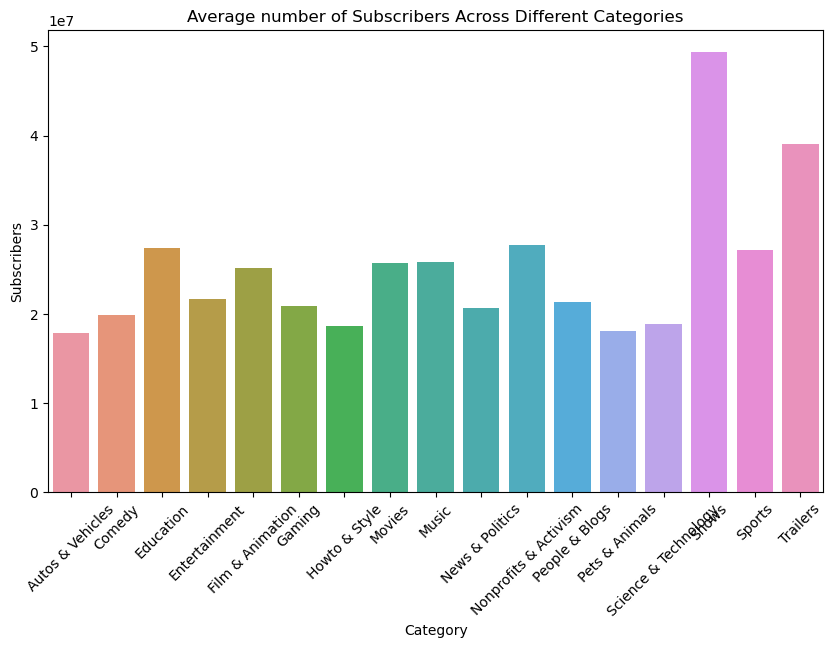

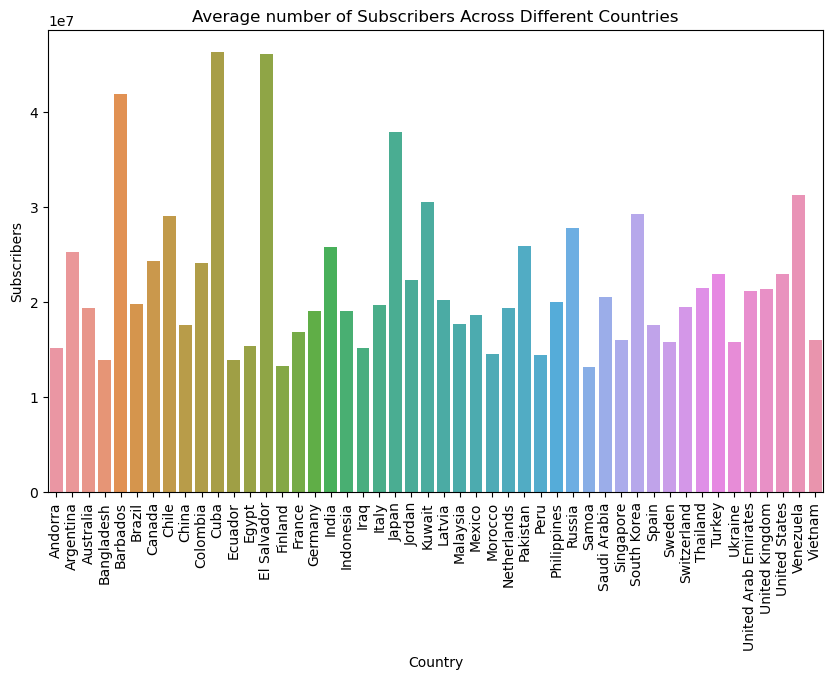

In [68]:

# Create a bar plot for subscribers across different categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_stats.index, y='subscribers', data= category_stats)
plt.title('Average number of Subscribers Across Different Categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.show()

# Create a bar plot for subscribers across different countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_stats.index, y='subscribers', data=country_stats)
plt.title('Average number of Subscribers Across Different Countries')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Subscribers')
plt.show()


The above bar plot graph for subscribers across different content categories, "Shows" has the greatest average number of subscribers, followed by "Music" and "Film & Animation." This implies that channels in the "Shows" category have a greater subscriber base.
According to the bar plot for subscribers across countries, channels in the United States have the largest average number of subscribers, followed by channels in India and South Korea. This means that the US is a key donor to channels with a huge subscriber base.
These visualizations give insights into the distribution of subscribers, helping in understanding which categories and regions have higher average subscriber numbers.


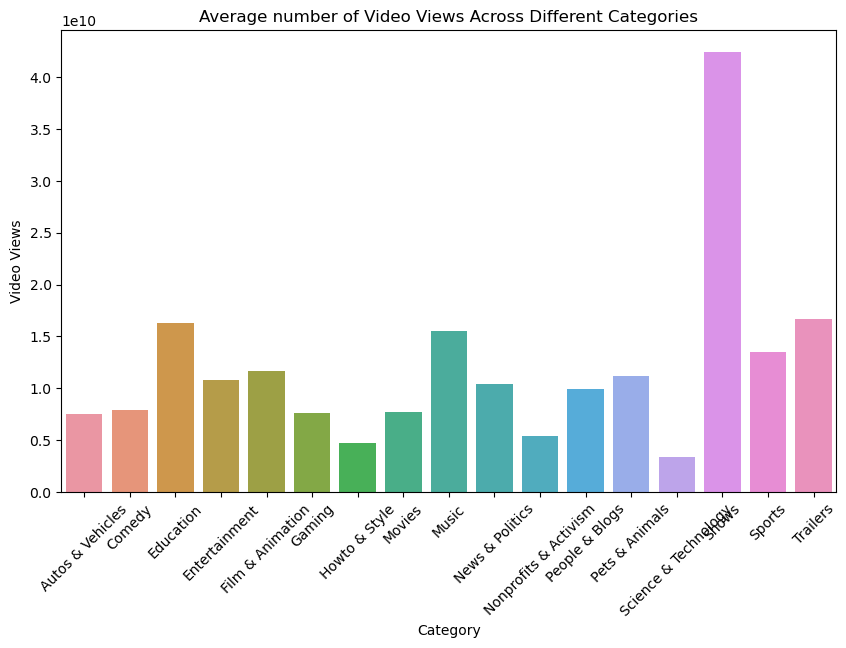

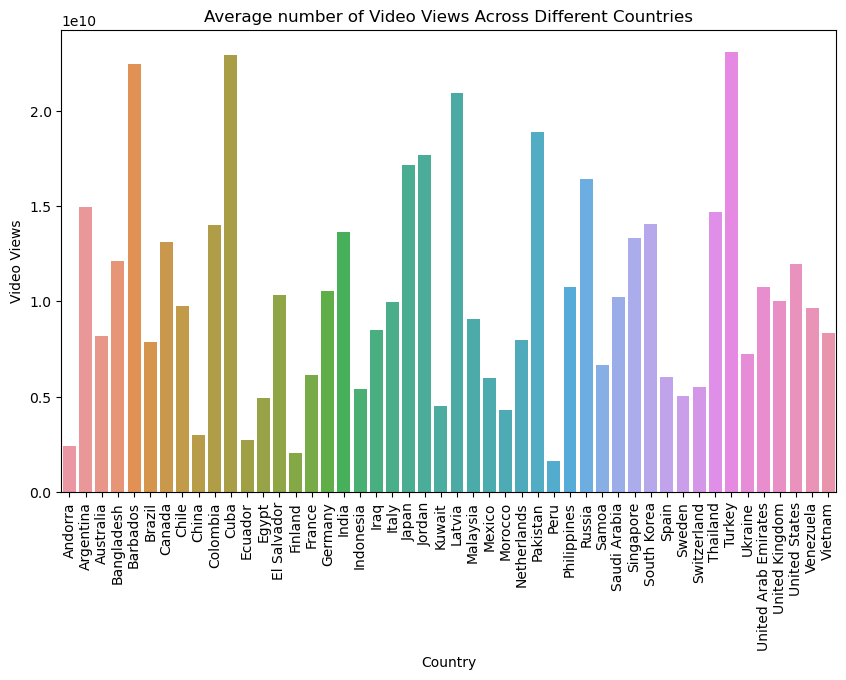

In [69]:

# Create a bar plot for video views across different categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_stats.index, y='video views', data= category_stats)
plt.title('Average number of Video Views Across Different Categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Video Views')
plt.show()

# Create a bar plot for video views across different countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_stats.index, y='video views', data=country_stats)
plt.title('Average number of Video Views Across Different Countries')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Video Views')
plt.show()


Based on the bar plot displaying the number of video views across various content categories, "Shows" has the highest average number of views, followed by "Music" and "Film & Animation." This demonstrates that the average number of video views for channels in the "Shows" category is higher.
Channels in the United States had the highest average number of video views, followed by channels in India and South Korea, according to the bar plot for video views across different countries. This indicates that a significant portion of channels with a high volume of video views come from the United States.
Understanding which categories and nations have higher average video view counts is made easier with the aid of these visualizations, which provide insights into the distribution of video views. 


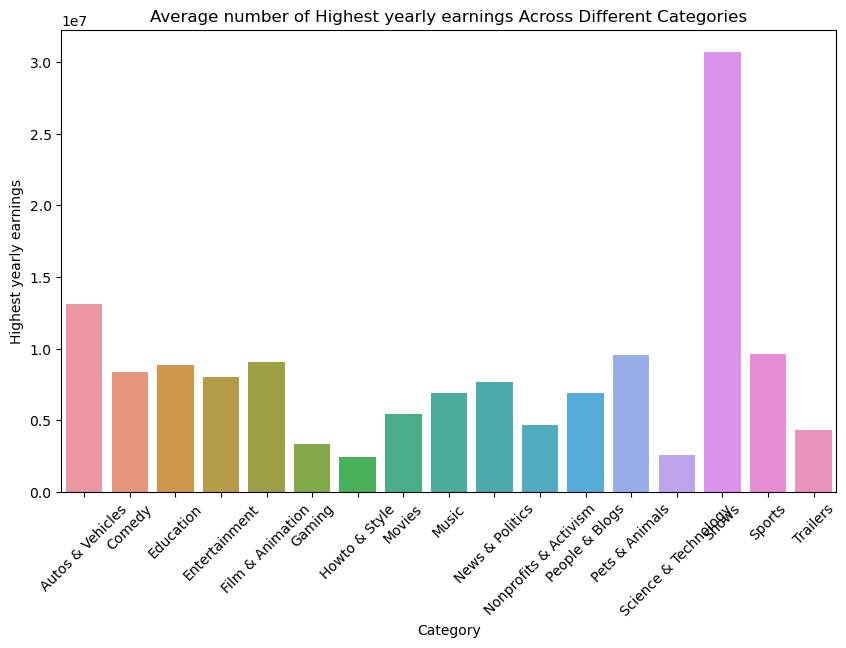

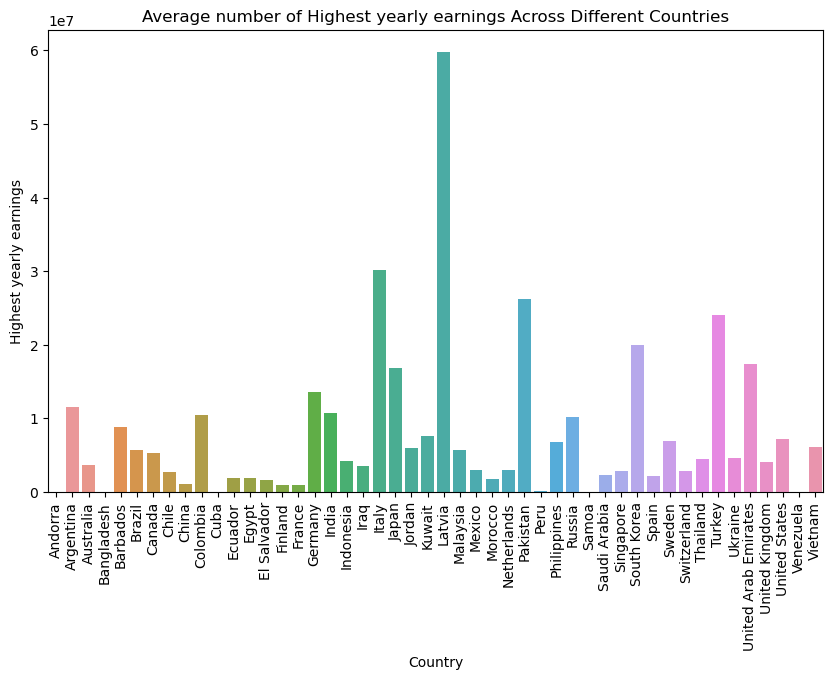

In [70]:

# Create a bar plot for highest yearly earnings across different categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_stats.index, y='highest_yearly_earnings', data= category_stats)
plt.title('Average number of Highest yearly earnings Across Different Categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Highest yearly earnings')
plt.show()

# Create a bar plot for highest yearly earnings across different countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_stats.index, y='highest_yearly_earnings', data=country_stats)
plt.title('Average number of Highest yearly earnings Across Different Countries')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Highest yearly earnings')
plt.show()


According to the bar plot displaying the greatest yearly profits across several content categories, "Shows" has the highest average yearly earnings, followed by "Music" and "Film & Animation." This implies that, on average, channels in the "Shows" category likely to make more money.
The United States' channels have the greatest average yearly wages in the bar plot of the highest salaries across various nations, followed by those of South Korea and Japan. This suggests that the US is a major player in channels with higher average annual wages.
These graphs shed light on the distribution of greatest annual earnings and make it easier to pinpoint the industries and nations that have higher average incomes.
